## Nama     : Syahrul Bhudi Ferdiansyah
## Kelas    : TI 3B
## NIM      : 2241720167

# Intro

Pada kuis ini, Anda diminta untuk melakukan klasifikasi citra wajah dengan menggunakan dataset Labeled Face in Wild (LFW).
Spesifikasi pengerjaan kuis yang harus dipehuni adalah,

1. Setiap label dari dataset LFW harus berisikan minimal 10 gambar (5 poin)
2. Citra yang digunakan merupakan citra RGB / color (5 poin)
3. (Opsional) Lakukan proses pra pengolahan data jika diperlukan (ekstra 10 poin)
4. (Wajib) Gunakan fitur histogram untuk setiap channel citra (35 poin)
5. (Wajib) Gunakan algoritma SVM sebagai model dasar (35 poin)
6. (Wajib) Gunakan metric akurasi, dan *classification report* untuk melihat performa model (20 poin)

## Challenge 
Setelah menyelesaikan kuis berdasarkan spesifikasi wajib, Anda diperkenankan untuk

- Menggunakan fitur lain selain histogram (ekstra 20 poin)
- Menggunakan model lain selain SVM (ekstra 10 poin)
- Evalusi dengan metric lain ataupun report dengan *confusion matrix* (ekstra 10 poin)

# Boilerplate

Berikut merupakan boilerplate code yang dapat Anda gunakan sebagai acuan dasar pengerjaan kuis.
Anda diperkenankan untuk **menambah** ataupun **mengurangi** bagian boilerplate yang disediakan.

---

# Preparation

In [250]:
# Load required library
# Import Required Library
import numpy as np
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier

# Load Data

In [251]:
# Load Dataset
# We will load dataset only for faces with contain min 10 images
# We also want to keep images in color; color=True

faces = fetch_lfw_people(min_faces_per_person=10, color=True)

# Check Faces
print(f'Total Label: {len(faces.target_names)}')
print(f'Data dimension: {faces.images.shape}')
print(f'Images flatten dimension: {faces.data.shape}')

Total Label: 6
Data dimension: (187, 62, 47, 3)
Images flatten dimension: (187, 8742)


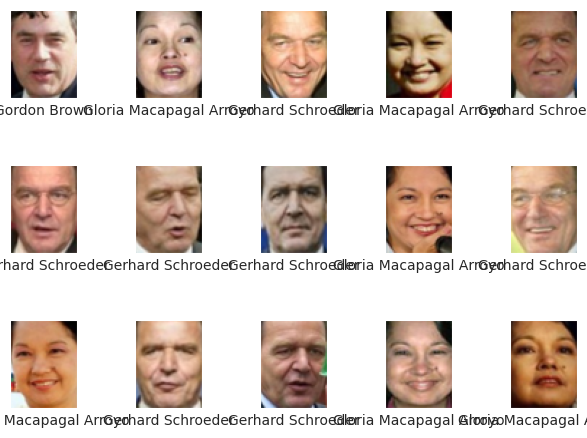

In [252]:
# Check by Plotted Images
# Generate random 15 images
rand_labels = [np.random.randint(0, len(faces.data)) for x in range(0, 15)]

fig, ax = plt.subplots(3, 5)
fig.tight_layout()
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[rand_labels[i]], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[rand_labels[i]]])

# Preprocessing

In [253]:
#3. (Opsional) Lakukan proses pra pengolahan data jika diperlukan (ekstra 10 poin)
scaler = StandardScaler()
faces_scaled = scaler.fit_transform(faces.data)

faces_scaled = faces_scaled.reshape(faces.images.shape)

print(f'Data dimension: {faces_scaled.shape}')

Data dimension: (187, 62, 47, 3)


# Features Extraction

In [254]:
# Fungsi untuk menghitung histogram
def calculate_histograms(images):
    histograms = []
    for image in images:
        image_histograms = []
        for i in range(3):
            channel_data = image[:, :, i].flatten()
            hist, _ = np.histogram(channel_data, bins=256, range=(0, 256))
            image_histograms.append(hist)
        histograms.append(np.concatenate(image_histograms))
    return np.array(histograms)

# # Hitung histogram untuk semua gambar
# X = calculate_histograms(faces.images)
# y = faces.target

# Build Model

In [255]:
'''
    Pada bagian ini lakukan proses pembuatan model,

    1. Pembuatan data training dan data testing
    2. Pembuatan objek model
    3. Proses fitting model
'''
X = faces.data  # Flattened image data
y = faces.target
# Bagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalisasi fitur
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# Inisialisasi dan latih model SVM
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)

# Definisikan parameter grid
# Karena hasil predict yang rendah saya cari cara lain agar accuracy meningkat, jika di train 2x maka hasilnya lebih baik   
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(SVC(), param_grid, refit=True, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time=   0.0s
[CV] END ...................C=0.1, gamma=auto, 

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': ['scale', 'auto', 0.1, 1, 10],
                         'kernel': ['linear', 'rbf']},
             verbose=2)

# Evaluation

Akurasi: 0.82

Classification Report:
                         precision    recall  f1-score   support

         George HW Bush       0.50      0.25      0.33         4
      Gerhard Schroeder       0.78      0.95      0.86        22
Gloria Macapagal Arroyo       0.88      1.00      0.93        14
           Gordon Brown       1.00      1.00      1.00         1
     Michael Schumacher       1.00      0.56      0.71         9
            Tiger Woods       0.83      0.71      0.77         7

               accuracy                           0.82        57
              macro avg       0.83      0.75      0.77        57
           weighted avg       0.83      0.82      0.81        57



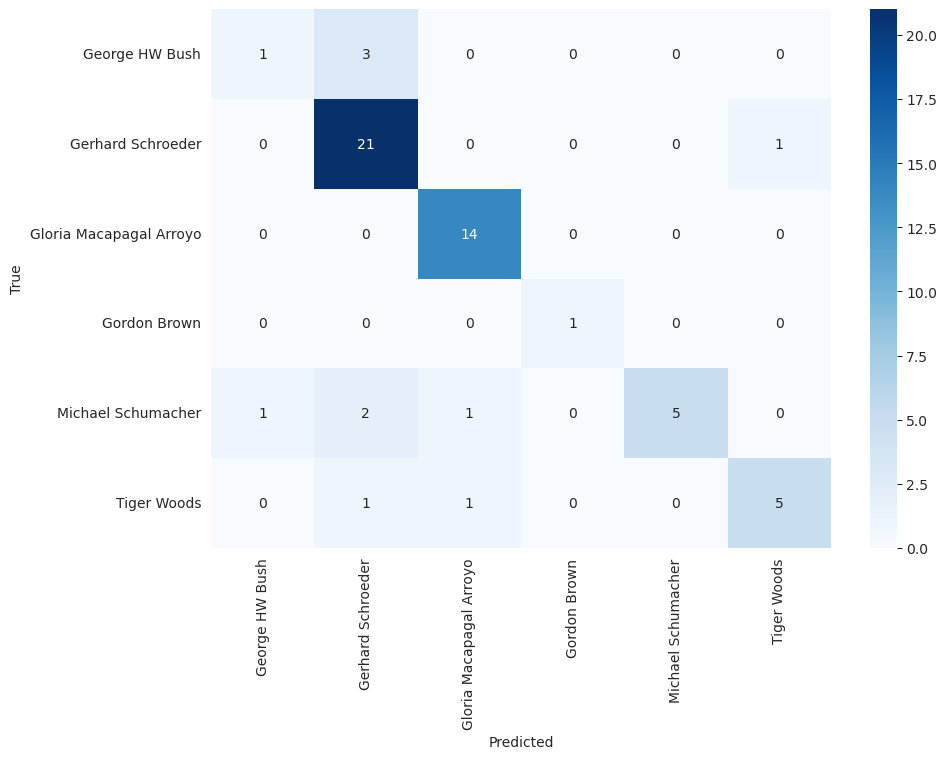

In [256]:
'''
    Pada bagian ini, lakukan evaluasi terhadap data training dan data testing
    dengan menggunakan metric akurasi dan juga classfication report

    Hints:
        Anda dapat menggunakan referensi Jobseet 4 Percobaan 5
'''
# Gunakan model terbaik
svm_model = grid_search.best_estimator_

# Prediksi dan evaluasi lagi
y_pred = svm_model.predict(X_test)

# Hitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi: {accuracy:.2f}")

# Buat classification report dengan zero_division=1
report = classification_report(y_test, y_pred, target_names=faces.target_names, zero_division=1)
print("\nClassification Report:")
print(report)

# Visualisasikan confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=faces.target_names, yticklabels=faces.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [257]:
## Challenge Section    

# menggunakan PCA
# Konversi data gambar ke bentuk 2D
n_samples, h, w, d = faces.images.shape
X = faces.data

# Menggunakan PCA untuk mengurangi dimensi
n_components = 150
pca = PCA(n_components=n_components, whiten=True).fit(X)
X_pca = pca.transform(X)

In [258]:

# 2. Menggunakan model Random Forest
# Bagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X_pca, faces.target, test_size=0.3, random_state=42)

# Normalisasi fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inisialisasi dan latih model Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Prediksi menggunakan set pengujian
y_pred = rf_model.predict(X_test_scaled)

Akurasi: 0.47
                         precision    recall  f1-score   support

         George HW Bush       1.00      0.00      0.00         4
      Gerhard Schroeder       0.42      1.00      0.59        22
Gloria Macapagal Arroyo       1.00      0.36      0.53        14
           Gordon Brown       1.00      0.00      0.00         1
     Michael Schumacher       1.00      0.00      0.00         9
            Tiger Woods       1.00      0.00      0.00         7

               accuracy                           0.47        57
              macro avg       0.90      0.23      0.19        57
           weighted avg       0.78      0.47      0.36        57



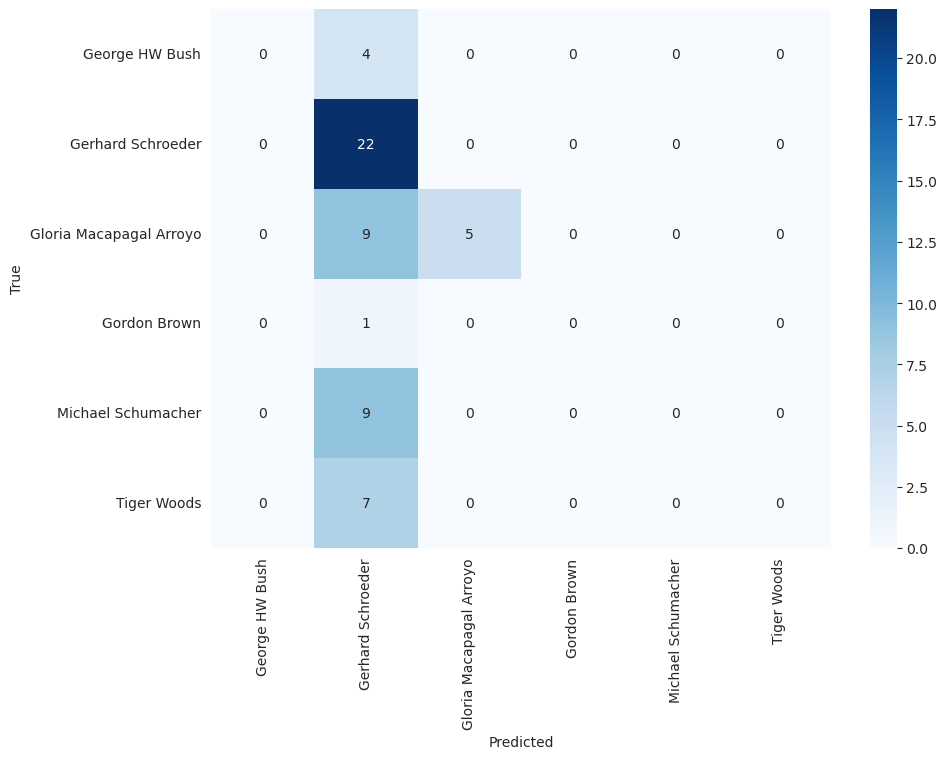

In [259]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi: {accuracy:.2f}")

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Generate classification report with zero_division=1
print(classification_report(y_test, y_pred, target_names=faces.target_names, zero_division=1))

# Visualize confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=faces.target_names, yticklabels=faces.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [266]:
from sklearn.naive_bayes import MultinomialNB

# Multinomial Naive Bayes
mnb = MultinomialNB()

X = abs(X)
y = abs(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

mnb.fit(X_train, y_train)

y_pred = mnb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f"Akurasi: {accuracy:.2f}")

print(classification_report(y_test, y_pred, target_names=faces.target_names, zero_division=1))

Akurasi: 0.70
                         precision    recall  f1-score   support

         George HW Bush       0.25      0.25      0.25         4
      Gerhard Schroeder       0.70      0.86      0.78        22
Gloria Macapagal Arroyo       0.93      0.93      0.93        14
           Gordon Brown       1.00      0.00      0.00         1
     Michael Schumacher       0.60      0.33      0.43         9
            Tiger Woods       0.57      0.57      0.57         7

               accuracy                           0.70        57
              macro avg       0.68      0.49      0.49        57
           weighted avg       0.70      0.70      0.68        57



In [269]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f"Akurasi: {accuracy:.2f}")

print(classification_report(y_test, y_pred, target_names=faces.target_names, zero_division=1))

Akurasi: 0.68
                         precision    recall  f1-score   support

         George HW Bush       0.33      0.25      0.29         4
      Gerhard Schroeder       0.77      0.77      0.77        22
Gloria Macapagal Arroyo       0.93      0.93      0.93        14
           Gordon Brown       1.00      0.00      0.00         1
     Michael Schumacher       0.60      0.33      0.43         9
            Tiger Woods       0.38      0.71      0.50         7

               accuracy                           0.68        57
              macro avg       0.67      0.50      0.49        57
           weighted avg       0.71      0.68      0.68        57

